In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("gym_membership_prediction.csv")

In [42]:
df.head()

,User ID,Age,Gender,Annual Income,Membership Type,Membership Duration,Frequency of Visit,Preferred Time,Previous Membership,Marital Status,Location,Promotion Response,Health Condition,Membership Prediction,Professional,Professional Status
0,1,62,Other,135305,Premium,46,2,Afternoon,Yes,Married,Rural,Yes,Average,No,Late Career,Retired
1,2,65,Male,59056,Basic,26,6,Afternoon,Yes,Single,Suburban,Yes,Good,No,Retired,Retired
2,3,18,Male,63857,Basic,46,2,Afternoon,No,Married,Rural,Yes,Excellent,No,Student,Student
3,4,21,Male,135072,Basic,54,1,Evening,No,Married,Suburban,No,Good,Yes,Student,Student
4,5,21,Female,59344,Basic,36,5,Morning,Yes,Single,Suburban,No,Excellent,Yes,Student,Student


In [43]:
print(df.isnull().sum())

User ID                  0
Age                      0
Gender                   0
Annual Income            0
Membership Type          0
Membership Duration      0
Frequency of Visit       0
Preferred Time           0
Previous Membership      0
Marital Status           0
Location                 0
Promotion Response       0
Health Condition         0
Membership Prediction    0
Professional             0
Professional Status      0
dtype: int64


In [44]:
print(df.duplicated().sum())

0


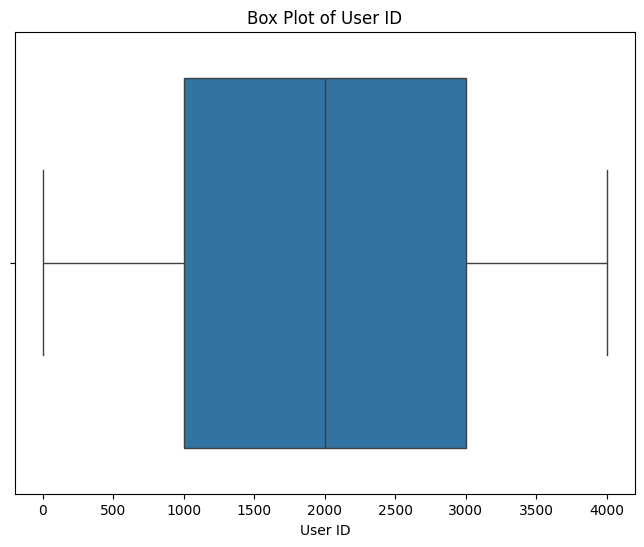

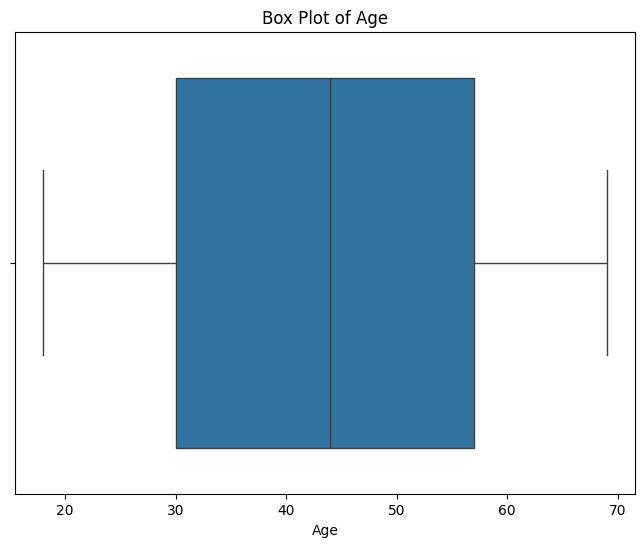

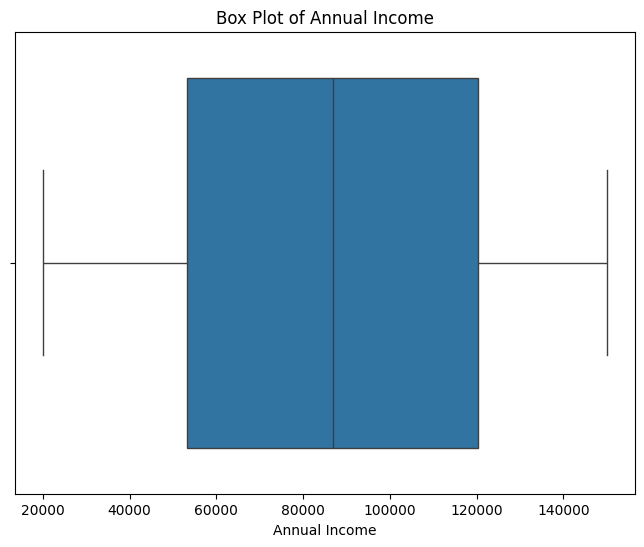

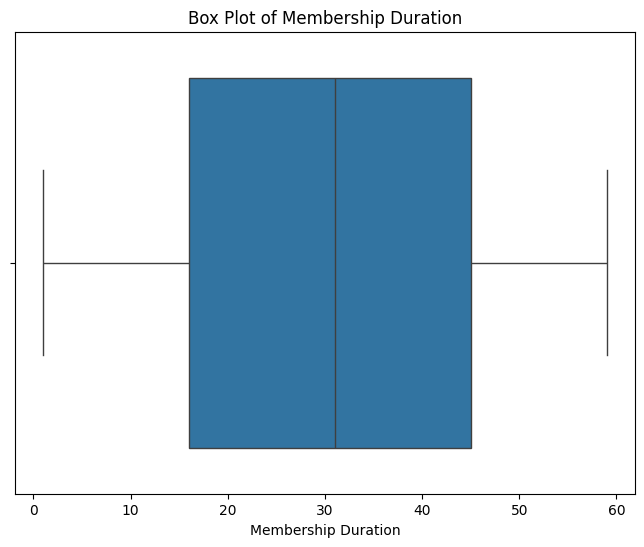

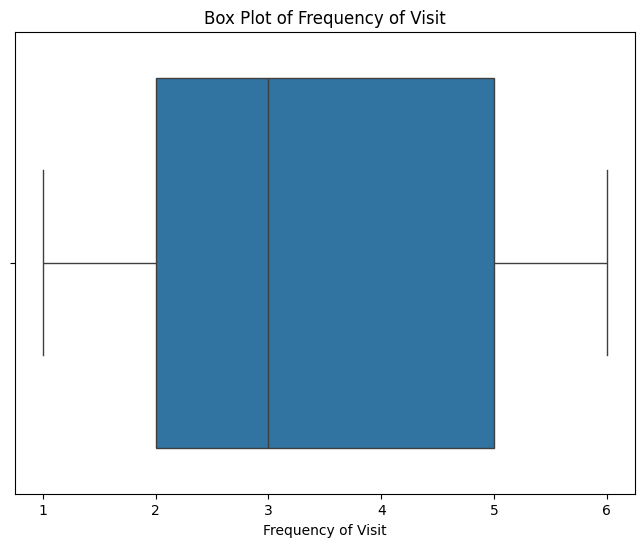

In [45]:
# --- Inspect and Handle Outliers ---
# Box plots for numerical features
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

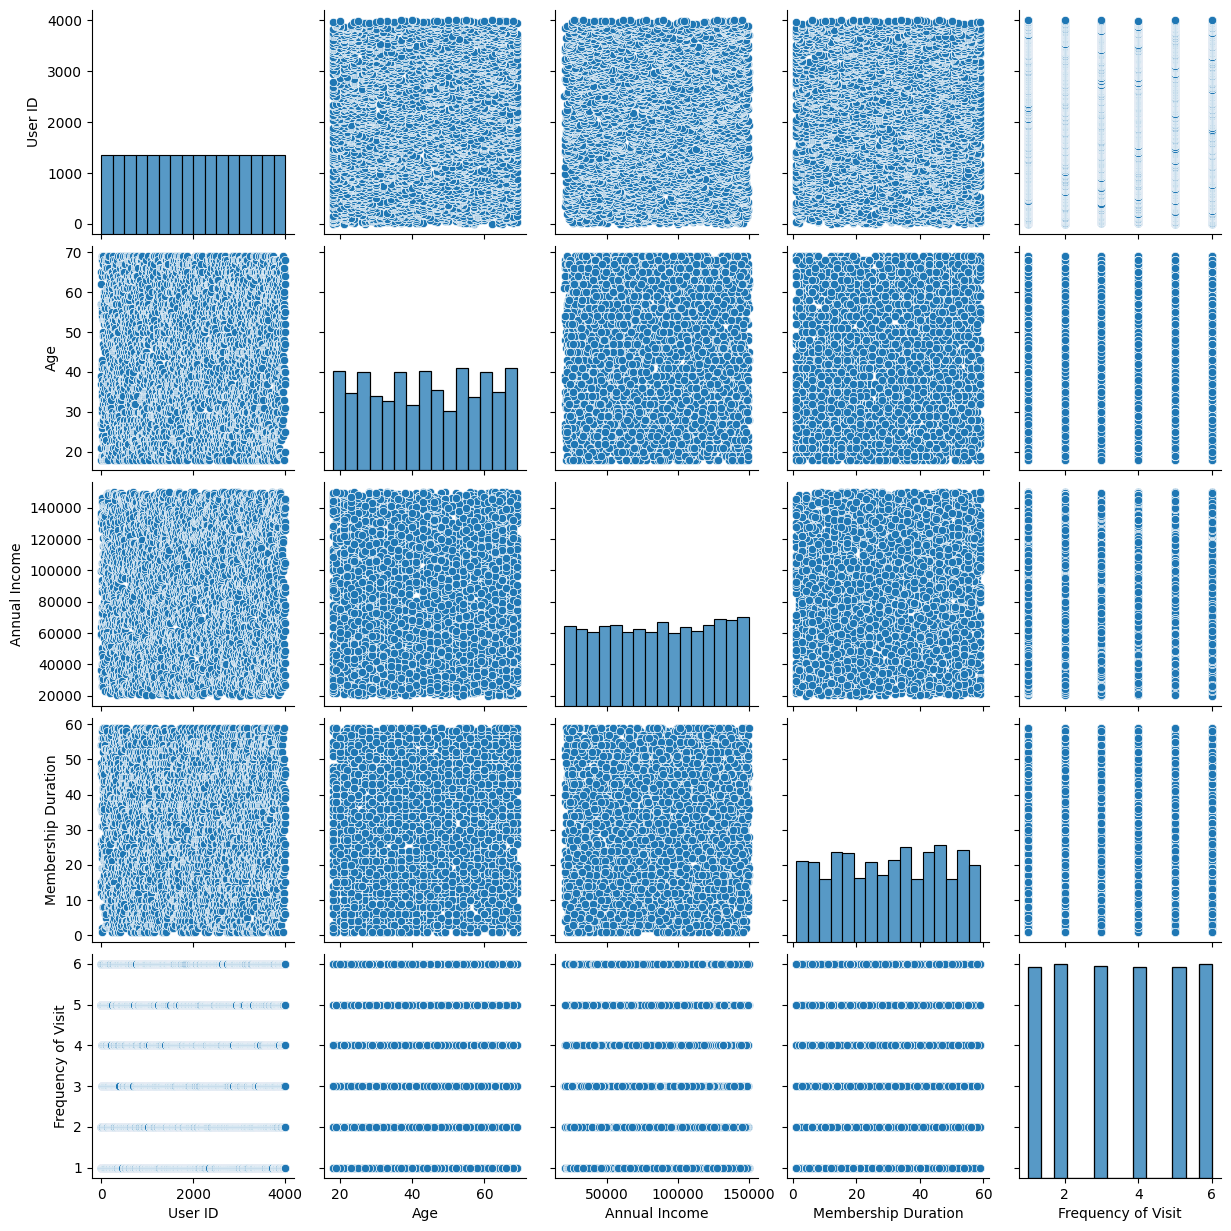

In [46]:
# Scatter plots for numerical features to check relationships
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [47]:
df1=df.copy()

In [48]:
# Remove the specified columns from df1
columns_to_remove = ['User ID']

df1 = df1.drop(columns=columns_to_remove)

# Display the first few rows of the updated dataset
print(df1.head())

   Age  Gender  Annual Income Membership Type  Membership Duration  \
0   62   Other         135305         Premium                   46   
1   65    Male          59056           Basic                   26   
2   18    Male          63857           Basic                   46   
3   21    Male         135072           Basic                   54   
4   21  Female          59344           Basic                   36   

   Frequency of Visit Preferred Time Previous Membership Marital Status  \
0                   2      Afternoon                 Yes        Married   
1                   6      Afternoon                 Yes         Single   
2                   2      Afternoon                  No        Married   
3                   1        Evening                  No        Married   
4                   5        Morning                 Yes         Single   

   Location Promotion Response Health Condition Membership Prediction  \
0     Rural                Yes          Average        

In [49]:
# Change column names to lowercase
df2.columns = df2.columns.str.lower()

# Change attribute values in all categorical columns to lowercase
categorical_columns = df2.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_columns:
    df2[col] = df2[col].str.lower()

# Display the first few rows of the updated DataFrame
print(df2.head())

   age  annual income membership type  membership duration  \
0   62         135305         premium                   46   
1   65          59056           basic                   26   
2   18          63857           basic                   46   
3   21         135072           basic                   54   
4   21          59344           basic                   36   

   frequency of visit previous membership health condition  \
0                   2                 yes          average   
1                   6                 yes             good   
2                   2                  no        excellent   
3                   1                  no             good   
4                   5                 yes        excellent   

  membership prediction professional professional status  
0                    no   latecareer             retired  
1                    no      retired             retired  
2                    no      student             student  
3                 

In [50]:
# Remove spaces and commas from the entire dataset
df2 = df2.applymap(lambda x: x.replace(" ", "").replace(",", "") if isinstance(x, str) else x)

# Display the first few rows to verify
print(df2.head())

   age  annual income membership type  membership duration  \
0   62         135305         premium                   46   
1   65          59056           basic                   26   
2   18          63857           basic                   46   
3   21         135072           basic                   54   
4   21          59344           basic                   36   

   frequency of visit previous membership health condition  \
0                   2                 yes          average   
1                   6                 yes             good   
2                   2                  no        excellent   
3                   1                  no             good   
4                   5                 yes        excellent   

  membership prediction professional professional status  
0                    no   latecareer             retired  
1                    no      retired             retired  
2                    no      student             student  
3                 

/tmp/ipython-input-50-3512205569.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.replace(" ", "").replace(",", "") if isinstance(x, str) else x)


In [51]:
# One-hot encode all categorical columns in df2
df2_encoded = pd.get_dummies(df2, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df2_encoded.head())


   age  annual income  membership duration  frequency of visit  \
0   62         135305                   46                   2   
1   65          59056                   26                   6   
2   18          63857                   46                   2   
3   21         135072                   54                   1   
4   21          59344                   36                   5   

   membership type_premium  membership type_vip  previous membership_yes  \
0                     True                False                     True   
1                    False                False                     True   
2                    False                False                    False   
3                    False                False                    False   
4                    False                False                     True   

   health condition_excellent  health condition_good  health condition_poor  \
0                       False                  False               

In [52]:
# Convert True/False to 1/0 in the entire DataFrame
df2_encoded = df2_encoded.astype(int)

# Display the first few rows to verify
print(df2_encoded.head())

   age  annual income  membership duration  frequency of visit  \
0   62         135305                   46                   2   
1   65          59056                   26                   6   
2   18          63857                   46                   2   
3   21         135072                   54                   1   
4   21          59344                   36                   5   

   membership type_premium  membership type_vip  previous membership_yes  \
0                        1                    0                        1   
1                        0                    0                        1   
2                        0                    0                        0   
3                        0                    0                        0   
4                        0                    0                        1   

   health condition_excellent  health condition_good  health condition_poor  \
0                           0                      0               

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to scale
numerical_columns = ['age', 'annual income', 'membership duration', 'frequency of visit']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to the numerical columns
df2_encoded[numerical_columns] = scaler.fit_transform(df2_encoded[numerical_columns])

# Display the first few rows of the scaled dataset
print(df2_encoded.head())

        age  annual income  membership duration  frequency of visit  \
0  0.862745       0.887058             0.775862                 0.2   
1  0.921569       0.300229             0.431034                 1.0   
2  0.000000       0.337179             0.775862                 0.2   
3  0.058824       0.885265             0.913793                 0.0   
4  0.058824       0.302446             0.603448                 0.8   

   membership type_premium  membership type_vip  previous membership_yes  \
0                        1                    0                        1   
1                        0                    0                        1   
2                        0                    0                        0   
3                        0                    0                        0   
4                        0                    0                        1   

   health condition_excellent  health condition_good  health condition_poor  \
0                           0        

In [19]:
# Define features (X) and target (y)
X = df2_encoded.drop(columns=['membership prediction_yes'])  # Drop the target column
y = df2_encoded['membership prediction_yes']  # Target variable

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Performance:
Accuracy: 0.485
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       405
           1       0.48      0.52      0.50       395

    accuracy                           0.48       800
   macro avg       0.49      0.49      0.48       800
weighted avg       0.49      0.48      0.48       800



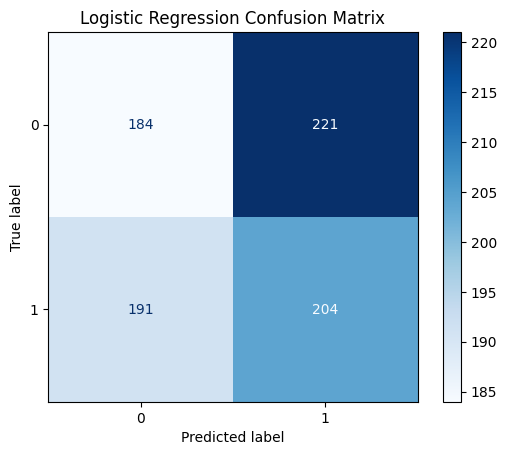

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Optional: change color map
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest Performance:
Accuracy: 0.51625
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       405
           1       0.51      0.51      0.51       395

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800



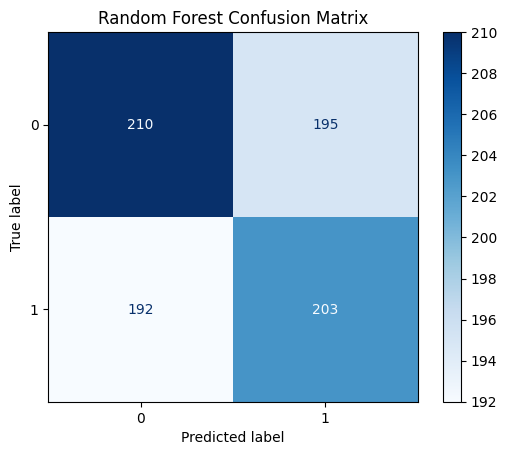

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

SVM Performance:
Accuracy: 0.505
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       405
           1       0.50      0.61      0.55       395

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.50       800



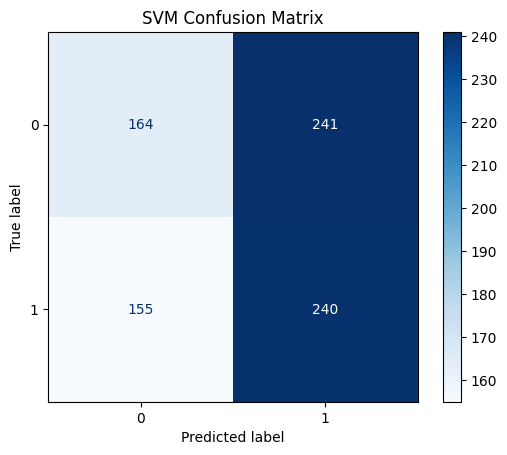

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train SVM model
svm = SVC(random_state=42)  # You can add kernel='linear' or 'rbf' as needed
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate SVM performance
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.5275
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       405
           1       0.52      0.52      0.52       395

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



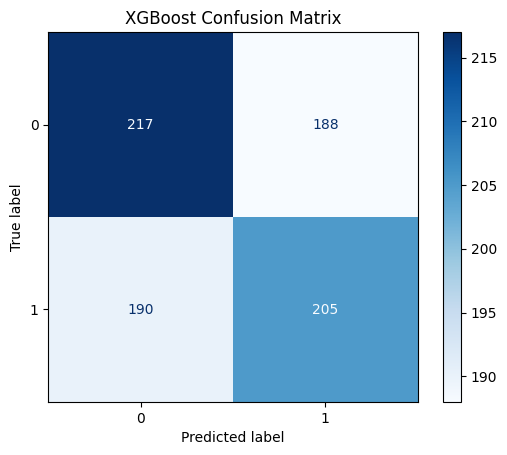

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Avoid warning
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost performance
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.4775
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.11      0.18       405
           1       0.48      0.85      0.62       395

    accuracy                           0.48       800
   macro avg       0.46      0.48      0.40       800
weighted avg       0.46      0.48      0.40       800



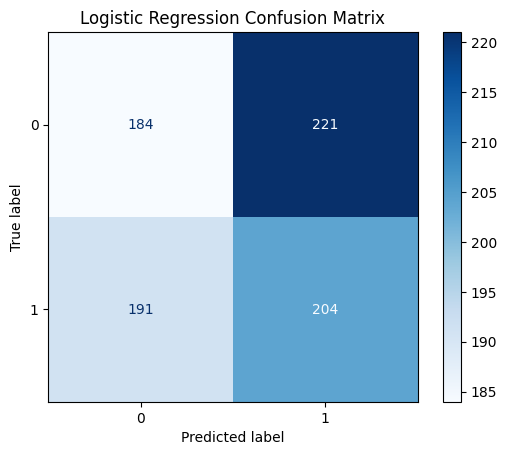

In [37]:
# Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Optional: change color map
plt.title("Logistic Regression Confusion Matrix")
plt.show()